## 3.2.6　SARIMA（季節性自己回帰和分移動平均）モデルの原理

・季節性自己回帰和分移動平均モデル：ARIMA（自己回帰和分移動平均）モデルを、季節性のトレンドも捉えられるようにしたもの

・SARIMAモデルは、非定常性のデータに適用できる

In [1]:
import io
import requests
import statsmodels
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [2]:
content = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True, dtype='float')
content

,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [3]:
content = content.rename(columns={'#Passengers': 'passengers'})

print(content.shape)
content.head(10)

(144, 1)


,passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


In [4]:
pd.DataFrame([['Month', '月'],
              ['passenger', '飛行機の乗客数']],
              columns=['カラム', '意味'])

,カラム,意味
0,Month,月
1,passenger,飛行機の乗客数


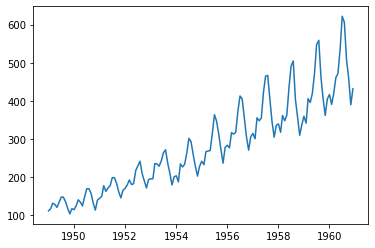

In [5]:
passengers = content['passengers']

plt.plot(passengers)
plt.show()

・自己相関（ACF）：$y(t)$ と $y(t-h)$　の間のすべてのデータを介して相関を計算<br>
・偏自己相関（PACF）：$y(t)$ と $y(t-h)$　の2のデータのみで相関を計算

・ADF検定（Augmented Dicky-Fuller test）を行う

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


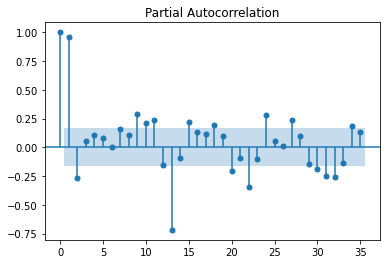

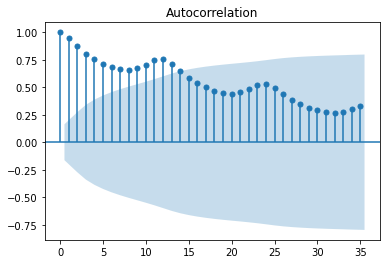

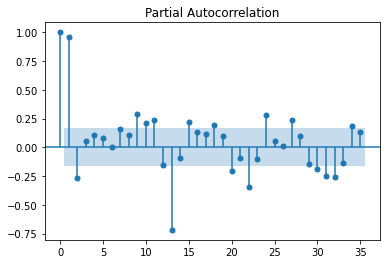

In [6]:
result = sm.tsa.stattools.adfuller(passengers)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
sm.graphics.tsa.plot_acf(passengers, lags=35)
sm.graphics.tsa.plot_pacf(passengers, lags=35)

・p値が非常に大きいので、データは非定常性をもつことが示される<br>
・ADF統計値は、すべての臨界値（Critical Value）より大きいので、非定常性であることが示唆される

・ホワイトノイズ：正規乱数ノイズ

・月ごとの飛行機の乗客数なので、ラグ1で大きな正の相関がある<br>
・つまり、先月の乗客数が多ければ今月も多くなる傾向がある（先月と今月のデータが正の相関という意味である）

In [7]:
max_p = 3
max_q = 3
max_d = 2
max_sp = 1
max_sq = 1
max_sd = 1

pattern = max_p*(max_d + 1)*(max_q + 1)*(max_sp + 1)*(max_sq + 1)*(max_sd + 1)

In [8]:
modelselection = pd.DataFrame(np.nan, index=range(pattern), columns=["model", "aic"])
print(modelselection.shape)

(288, 2)


In [12]:
'''
num = 0

for p in range(1, max_p + 1):
    for d in range(0, max_d + 1):
        for q in range(0, max_q + 1):
            for sp in range(0, max_sp + 1):
                for sd in range(0, max_sd + 1):
                    for sq in range(0, max_sq + 1):
                        sarima = sm.tsa.SARIMAX(passengers,
                                                order=(p, d, q),
                                                seasonal_order=(sp, sd, sq, 12),
                                                enforce_stationarity = False,
                                                enforce_invertibility = False).fit()
                        
                        modelselection.iloc[num, 0] = 'order=(' + str(p) + ',' + str(d) + ',' + str(q) + '), season=(' + str(sp) + ',' + str(sd) + ',' + str(sq) + ')'
                        modelselection.iloc[num, 1] = sarima.aic
                        num = num + 1
                        
modelselection.sort_values(by='aic').head()'''

"\nnum = 0\n\nfor p in range(1, max_p + 1):\n    for d in range(0, max_d + 1):\n        for q in range(0, max_q + 1):\n            for sp in range(0, max_sp + 1):\n                for sd in range(0, max_sd + 1):\n                    for sq in range(0, max_sq + 1):\n                        sarima = sm.tsa.SARIMAX(passengers,\n                                                order=(p, d, q),\n                                                seasonal_order=(sp, sd, sq, 12),\n                                                enforce_stationarity = False,\n                                                enforce_invertibility = False).fit()\n                        \n                        modelselection.iloc[num, 0] = 'order=(' + str(p) + ',' + str(d) + ',' + str(q) + '), season=(' + str(sp) + ',' + str(sd) + ',' + str(sq) + ')'\n                        modelselection.iloc[num, 1] = sarima.aic\n                        num = num + 1\n                        \nmodelselection.sort_values(by='aic'

In [11]:
SARIMA= sm.tsa.SARIMAX(passengers, order=(3,1,3), seasonal_order=(0,1,1,12), enforce_stationarity = False, enforce_invertibility = False).fit()

D:\Users\113305A00BRB7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Users\113305A00BRB7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


・SARIMAモデルの残差（予測値と実測値の差）に対する相関分析を行う

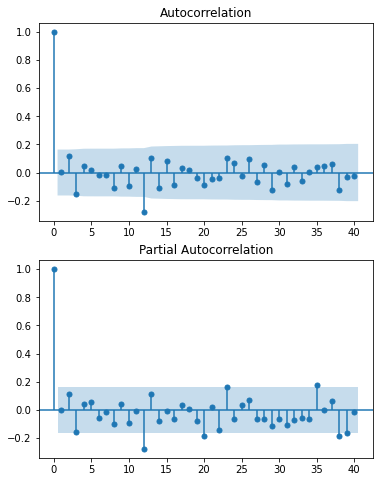

In [13]:
residSARIMA = SARIMA.resid
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=40, ax=ax2)

・定常性のデータであれば、残差どうしに相関はない<br>
・上記のデータだと、残差どうしにほとんど相関が残っていないので、定常性のデータであるといえる

In [14]:
passengers[72:120].head()

Month
1955-01-01    242.0
1955-02-01    233.0
1955-03-01    267.0
1955-04-01    269.0
1955-05-01    270.0
Name: passengers, dtype: float64

In [15]:
passengers[72:120].tail()

Month
1958-08-01    505.0
1958-09-01    404.0
1958-10-01    359.0
1958-11-01    310.0
1958-12-01    337.0
Name: passengers, dtype: float64

(array([-5479., -5298., -5114., -4932., -4748., -4567., -4383., -4202.,
        -4018.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

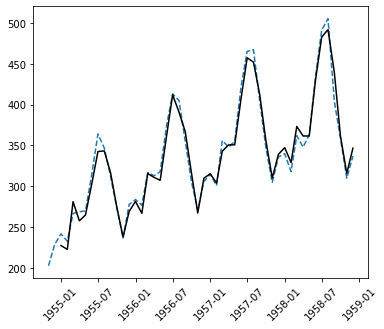

In [16]:
pred = SARIMA.predict('1955-01-01', '1958-12-01',typ='levels')
plt.figure(figsize=(6,5))
plt.plot(passengers[70:120],'--')
plt.plot(pred, "k")
plt.xticks(rotation=45)

・In-sample 法：学習データの範囲内で行う予測（上記）<br>
・Out-sample 法：学習データの範囲外で行う予測（下記）

・見せかけの回帰：上記のように、予測値がおおむね実測値の結果をそのまま写しているように見える現象

(array([-7305., -6575., -5844., -5114., -4383., -3653., -2922., -2192.,
        -1461.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

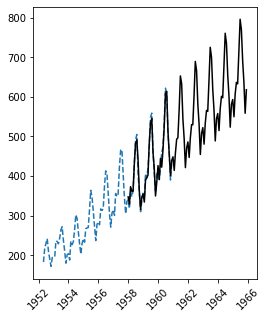

In [17]:
pred = SARIMA.predict('1958-01-01', '1965-12-01',typ='levels')
plt.figure(figsize=(4,5))
plt.plot(passengers[40:],'--')
plt.plot(pred, "k")
plt.xticks(rotation=45)

・上記に関して、予測値がトレンドを捉えられている<br>
・これは、残差にほとんど相関がなかったことから、SARIMAモデルが非定常性を上手く処理できているためと考えられる